   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


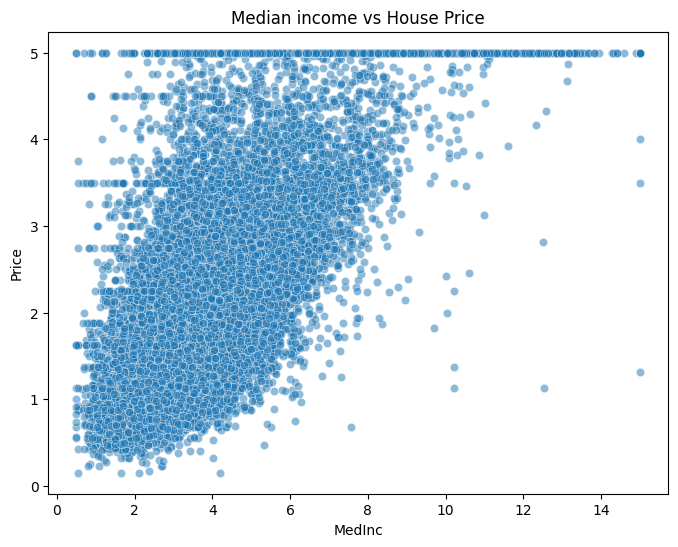

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#step load dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target
print(df.head())

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.scatterplot(x='MedInc',y='Price',data=df,alpha=0.5)
plt.title('Median income vs House Price')
plt.show()

In [8]:
corr_matrix=df.corr()

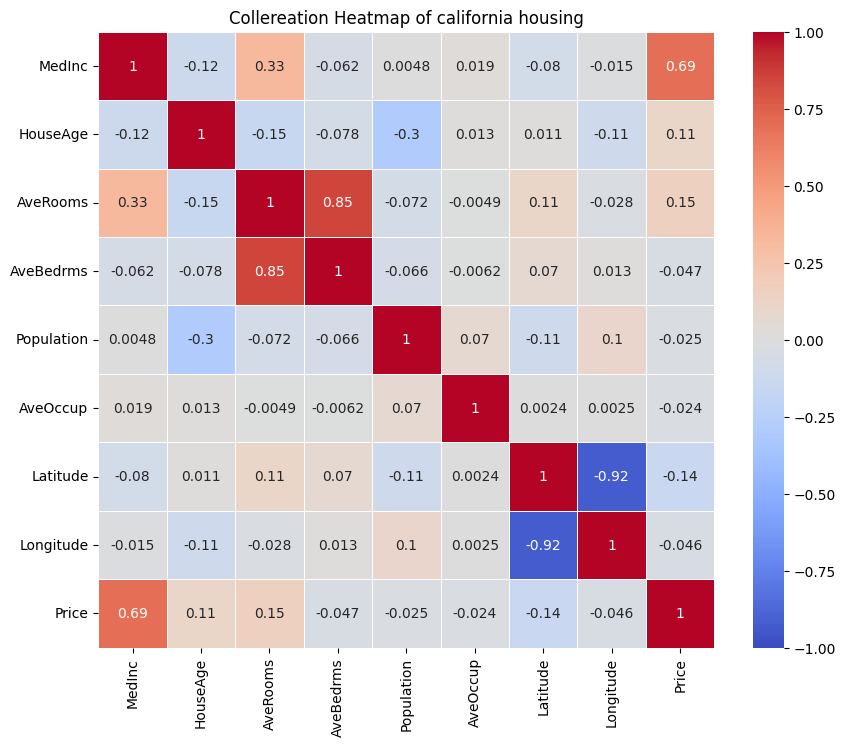

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,vmax=1,
            center=0,
            square=True,
            linewidths=0.5)
plt.title('Collereation Heatmap of california housing')
plt.show()

In [2]:
x=df[['MedInc']]
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [3]:
model=LinearRegression()
model.fit(x_train,y_train)
print(f'\nLinearEquation: Price = {model.coef_[0]:.2f} * MedInc + {model.intercept_:.2f}')


LinearEquation: Price = 0.42 * MedInc + 0.44


In [7]:
y_pred=model.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print(f'\nMAE: {mae:.2f} $100K')
print(f'RMSE: {rmse:.2f} $100K')
print(f'R^2 Score: {r2:.2f}')


MAE: 0.63 $100K
RMSE: 0.84 $100K
R^2 Score: 0.46


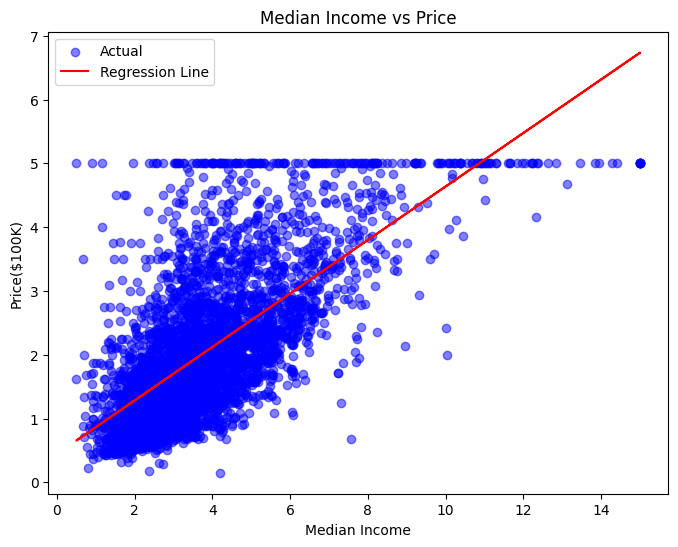

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(x_test,y_test,color='blue',label='Actual',alpha=0.5)
plt.plot(x_test,y_pred,color='red',label='Regression Line')
plt.xlabel('Median Income')
plt.ylabel('Price($100K)')
plt.title('Median Income vs Price')
plt.legend()
plt.show()